<a href="https://colab.research.google.com/github/svendstar/MyAppliedStatistics2020repository/blob/main/Measurement_of_each_persons_pendulum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install iminuit

     |████████████████████████████████| 286kB 9.1MB/s 


# ***Measuring Error on each persons uncertainty in  measuring time: Pendulum.***

In [112]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit
import os

In [113]:
!git clone https://github.com/svendstar/MyAppliedStatistics2020repository #Clones my repository (Where i have stored all of the timing files) into Google Colab environment

fatal: destination path 'MyAppliedStatistics2020repository' already exists and is not an empty directory.


**I will now create a function that loads each .dat file in a given directory, and saves them under a variable of the same name as a file**

#Groundwork

### Organizing Data

In [213]:
#Here i define the function:
def getfilenames(path):
  names=[]
  for filename in os.listdir(path):                   #Get the filename of every file in the specified path
    names.append(str(os.path.splitext(filename)[0]))  #Append the file name as a string in a list called "names"
  return names

In [214]:
filespath="MyAppliedStatistics2020repository/Period_measurements/" #Set the location of the path
names=getfilenames(filespath)   #Use the newly created function and save all names of the files into "names"
names.sort()                    #Sort the list of file names into alphebetical order for practicality
#print(names)


In [215]:
# Here we will nor create a variable for each of the timings data, and name them according to their original file name.
for i in names:
  globals()[i]=np.genfromtxt("MyAppliedStatistics2020repository/Period_measurements/"+i+".dat", delimiter="")

#Now we have code to get all of the relevant variables, complicated, but fast and can be be generalized to any number of files in a directory.

In [216]:
#Conviniently compact all of the variables into an array, so i can iterate in a function later
data=np.array([eval(name) for name in names])
print(data[1][:,1])

[ 37.8078  40.4982  43.2977  46.0056  48.5464  51.3801  54.0385  56.6569
  59.4345  62.1876  64.7531  67.4444  70.2652  72.9033  75.5768  78.4426
  81.0476  83.5963  86.4083  89.0287  91.6992  94.4398  97.1058  99.6825
 102.4054 105.1373 107.8847 110.5187 113.2569 115.806  118.6779 121.2945
 124.0446 126.5505 129.3223 132.0623 134.5229 137.3086 140.0717 142.732
 145.4555 148.1908 150.853  153.5504 156.2839 158.9026 161.6612 164.4332
 167.1787 169.7287]


#Starting analysis

## Defining functions:

In [209]:
def linearregression(x,y):
  """
  Parameters: x and y are n by 1 arrays; in form y=m*x+c
  Takes a set of x and y coordinates and fits a linear function.
  Uses analytical method 

  Returns: (m,c)
  """
  m=(np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-(np.mean(x))**2)
  c=np.mean(y)-np.mean(x)*m

  return m,c

def line(x,m,c):
  y=m*x+c
  return y

In [208]:
def linearfit(data):
  x=data[:,0]
  slope,intercept=linearregression(data[:,0],data[:,1])
  y=line(x,slope,intercept)
  fit=np.array([x,y])
  return fit

def timingerror(data):
  fit=linearfit(data)
  diff=data[:,1]-fit[1]
  return diff


##Start

With our data Organized and ready for analysis, and functions defines, we are ready to obtain results.

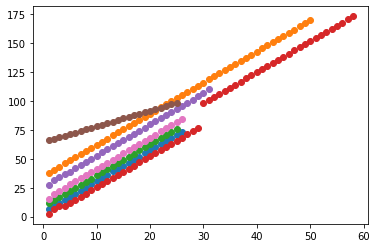

In [219]:
#First we plot all of our data, to see if we can find any anomalies.
for i in range(len(data)):
  plt.scatter(data[i][:,0],data[i][:,1])

As we can see from above plot, there are 2 anomalies, the red line is from daniels data, and the brown is from yiouli's data. Yioulis data can be explained by the fact that she measured in half periods, so i will take out those 2 datasets and analyse them seperately later in the program.

In [229]:
#First we create a new dataset, with only straightforward data:
index_position1=[0,1,2,4,6]
data2names=[names[i] for i in index_position]
data2=[data[i] for i in index_position1]

['LiamOther', 'Liam_Full_Pendulum_Period_timings', 'SvendFullPeriod', 'jiamei_1T', 'yiouli_period']


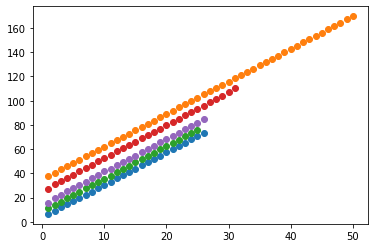

In [230]:
#we plot the new dataset to see if we got all the correct ones
for i in range(len(data2)):
  plt.scatter(data2[i][:,0],data2[i][:,1])
#yes we did
print(data2names)

In [260]:

for i in range(len(data2)):
  globals()[data2names[i]+"_sigma"]=np.std(timingerror(data2[i]))
  print(data2names[i]+"_sigma = ",globals()[data2names[i]+"_sigma"])


LiamOther_sigma =  0.18281717612231788
Liam_Full_Pendulum_Period_timings_sigma =  0.07502082067922994
SvendFullPeriod_sigma =  0.034004680035367225
jiamei_1T_sigma =  0.28291912428108335
yiouli_period_sigma =  0.32133784938309623


0.18281717612231788
0.07502082067922994
0.034004680035367225
0.28291912428108335
0.32133784938309623


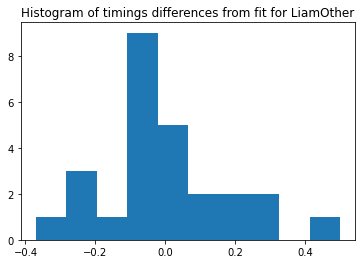

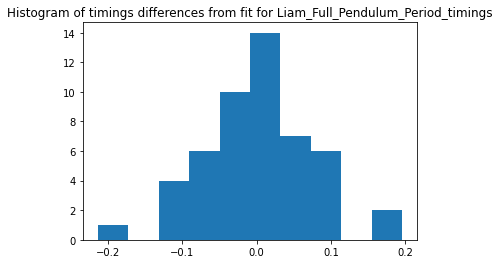

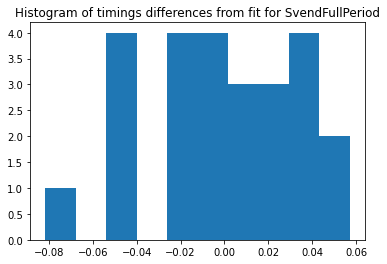

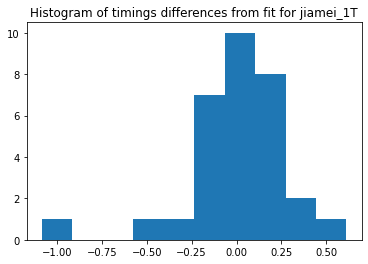

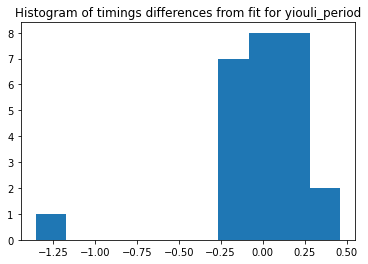

In [244]:
for i in range(len(data2)):
  plt.figure(i)
  plt.title("Histogram of timings differences from fit for " + data2names[i])
  plt.hist(timingerror(data2[i]))
  plt.savefig("Histogram of timings differences from fit for " + data2names[i])

(array([ 1.,  0.,  4.,  6., 10., 14.,  7.,  6.,  0.,  2.]),
 array([-0.21353359, -0.17259836, -0.13166313, -0.0907279 , -0.04979267,
        -0.00885744,  0.03207779,  0.07301302,  0.11394825,  0.15488348,
         0.19581871]),
 <a list of 10 Patch objects>)

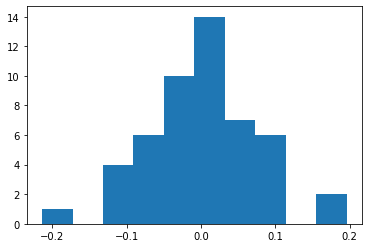

In [239]:
plt.hist(Liamdiff)

In [ ]:
a,b=uncertainty(yiouli_halfperiod)

# Misccelenious

##Finding daniels error

*Because daniels data had a sudden jump in the middle, i needed to analyse his data seperate from the others.*

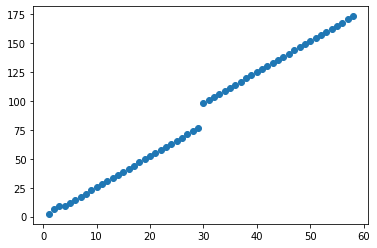

In [130]:
#As you can see here in the plot, including this data as 1 data set would obviously give us erronious results
#Therefore it must be split into 2 parts. 
#The intention of the pause was to show that the pendulum slows down over time.
#But we do not know how many time the pendulum have swung during the pause

plt.scatter(daniel_full[:,0],daniel_full[:,1])

In [125]:
#First we split daniels dataset into 2 parts, because his graph makes a sudden jump
d1=29
daniel1=daniel_full[:d1,:]
daniel2=daniel_full[d1:,:]

In [132]:
#Here i find the slope and intercept of daniel 1 and daniel 2 and daniel_full

d1m,d1c=linearregression(daniel1[:,0],daniel1[:,1])
d2m,d2c=linearregression(daniel1[:,0],daniel1[:,1])
dm,dc=linearregression(daniel1[:,0],daniel1[:,1])

#lets print the slopes of d1 and d2 to see how much they differ.
print(d1m,d2m)

2.651354137931035 2.651354137931035
